# Neural Zoo

Dans ce projet nous allons faire de la classification d'images en utilisant un MLP et un CNN afin de comparer leur résultat et conclure sur leur efficacité relative à la problématique.
Nous allons utiliser le dataset CIFAR - 10 pour les images d'animaux

### Import des librairies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.utils import to_categorical
import ssl

### Téléchargement du dataset et filtrage des données

Dans cette section on télécharge le dataset et on le split directement en données de train et de test.
On le filtre ensuite afin de ne garder que les classes correspondant à des animaux

In [2]:
ssl._create_default_https_context = ssl._create_unverified_context

# Récupération du dataset CIFAR-10
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.cifar10.load_data()

# Filtre les données pour garder seulement les images d'animaux
animal_classes = [2, 3, 4, 5, 6, 7]
animals = {2: 'Bird', 3: 'Cat', 4: 'Deer', 5: 'Dog', 6: 'Frog', 7: 'Horse'}
animal_indices = np.isin(y_train_full, animal_classes).flatten()
X_train_filtered = X_train_full[animal_indices]
y_train_filtered = y_train_full[animal_indices]
animal_indices2 = np.isin(y_test, animal_classes).flatten()
X_test_filtered = X_test[animal_indices2]
y_test_filtered = y_test[animal_indices2]

### Visualisation des données

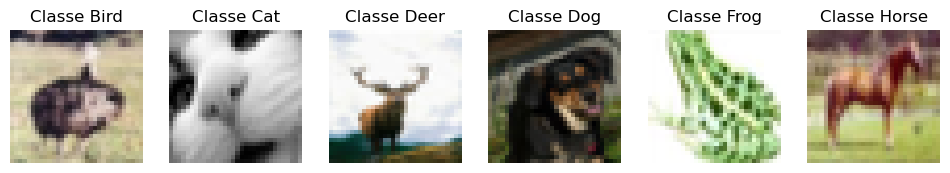

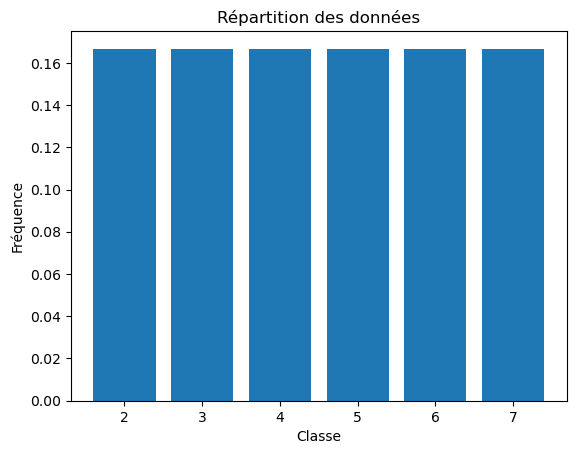

In [3]:
# Affiche une image par classe dans le Notebook
fig, axs = plt.subplots(1, len(animal_classes), figsize=(12, 3))
for i, animal_class in enumerate(animal_classes):
    class_indices = np.where(y_train_filtered == animal_class)[0]
    random_index = np.random.choice(class_indices)
    axs[i].imshow(X_train_filtered[random_index])
    axs[i].set_title(f"Classe {animals[animal_class]}")
    axs[i].axis("off")
plt.show()

# Analyse exploratoire du dataset
class_counts = np.unique(y_train_filtered, return_counts=True)
class_labels = [str(label) for label in class_counts[0]]
class_frequencies = class_counts[1] / len(y_train_filtered)

plt.bar(class_labels, class_frequencies)
plt.xlabel("Classe")
plt.ylabel("Fréquence")
plt.title("Répartition des données")
plt.show()

In [4]:
X_train_full.shape

(50000, 32, 32, 3)

In [5]:
y_train_full.shape

(50000, 1)

On voit que les données sont répartie de façon proportionelle au sein des différentes classes d'animaux, après filtration
il nous reste donc 50000 images d'une taille de 32*32px utilisants 3 canaux de couleur (RGB).
Nous allons maintenant pré-traiter les données pour leur utilisation dans nos modèles

### Pré-Traitement des données

In [6]:
# Séparation des données en ensembles d'entraînement et de validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train_filtered, y_train_filtered, test_size=0.2)

# Prétraitement des données
X_train = X_train.astype("float32") / 255.0
X_val = X_val.astype("float32") / 255.0
X_test_filtered = X_test_filtered.astype("float32") / 255.0

y_train_flat = y_train.reshape(-1, 1)
y_val_flat = y_val.reshape(-1, 1)
y_test_flat = y_test_filtered.reshape(-1, 1)

enc = OneHotEncoder(categories=[animal_classes], sparse=False)
enc.fit(y_train_flat)

y_train = enc.transform(y_train_flat)
y_val = enc.transform(y_val_flat)
y_test_filtered = enc.transform(y_test_flat)


y_train

array([[0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.]])

In [7]:
X_train.shape

(24000, 32, 32, 3)

Nous avons réalisé une normalisation des valeurs des pixels ainsi qu'un encodage en utilisant OneHotEncoder pour transformer les labels en un vecteur catégoriel

### Modèle de MLP

In [8]:
# Construction du modèle MLP
mlp_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(6, activation="softmax")
])

# Compilation et entraînement du modèle MLP
mlp_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
mlp_history = mlp_model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
750/750 [==============================] - 12s 14ms/step - loss: 1.5592 - accuracy: 0.3770 - val_loss: 1.4714 - val_accuracy: 0.4197
Epoch 2/20
750/750 [==============================] - 14s 19ms/step - loss: 1.4426 - accuracy: 0.4287 - val_loss: 1.6377 - val_accuracy: 0.3665
Epoch 3/20
750/750 [==============================] - 11s 14ms/step - loss: 1.3932 - accuracy: 0.4513 - val_loss: 1.5052 - val_accuracy: 0.3952
Epoch 4/20
750/750 [==============================] - 8s 10ms/step - loss: 1.3687 - accuracy: 0.4599 - val_loss: 1.5136 - val_accuracy: 0.4045
Epoch 5/20
750/750 [==============================] - 7s 9ms/step - loss: 1.3394 - accuracy: 0.4770 - val_loss: 1.4243 - val_accuracy: 0.4305
Epoch 6/20
750/750 [==============================] - 7s 9ms/step - loss: 1.3276 - accuracy: 0.4823 - val_loss: 1.6008 - val_accuracy: 0.3802
Epoch 7/20
750/750 [==============================] - 8s 10ms/step - loss: 1.2939 - accuracy: 0.4987 - val_loss: 1.7237 - val_accuracy: 0.379

Après implémentation du modèle et différents essaies on peut voir que ce modèle produit des résulats assez mauvais, seulement 46% d'accuracy sur les données de validations

### Modèle de CNN

In [9]:
# Construction du modèle CNN
cnn_model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(6, activation="softmax")
])

# Compilation et entraînement du modèle CNN
cnn_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
cnn_history = cnn_model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
750/750 [==============================] - 26s 32ms/step - loss: 1.3188 - accuracy: 0.4902 - val_loss: 1.7437 - val_accuracy: 0.3747
Epoch 2/20
750/750 [==============================] - 23s 30ms/step - loss: 1.1099 - accuracy: 0.5846 - val_loss: 1.5077 - val_accuracy: 0.4127
Epoch 3/20
750/750 [==============================] - 22s 29ms/step - loss: 1.0238 - accuracy: 0.6207 - val_loss: 1.4286 - val_accuracy: 0.4943
Epoch 4/20
750/750 [==============================] - 22s 29ms/step - loss: 0.9429 - accuracy: 0.6512 - val_loss: 1.1147 - val_accuracy: 0.5740
Epoch 5/20
750/750 [==============================] - 22s 29ms/step - loss: 0.8810 - accuracy: 0.6730 - val_loss: 1.2267 - val_accuracy: 0.5568
Epoch 6/20
750/750 [==============================] - 21s 28ms/step - loss: 0.8250 - accuracy: 0.6915 - val_loss: 1.3234 - val_accuracy: 0.5310
Epoch 7/20
750/750 [==============================] - 21s 28ms/step - loss: 0.7670 - accuracy: 0.7134 - val_loss: 1.2494 - val_accuracy:

Les résultats avec ce modèle sont un peu plus concluants même si en comparant l'accuracy du train et l'accuracy de la validation on remarque que le modèle a fait un gros overfitting (91% sur le train contre 57% sur la validation...)

### Evaluation des modèles

In [10]:
# Évaluation des modèles sur les ensembles de validation et de test
y_test_indices = np.argmax(y_test_filtered, axis=1)

mlp_val_loss, mlp_val_accuracy = mlp_model.evaluate(X_val, y_val)
mlp_test_loss, mlp_test_accuracy = mlp_model.evaluate(X_test_filtered, y_test_filtered)
cnn_val_loss, cnn_val_accuracy = cnn_model.evaluate(X_val, y_val)
cnn_test_loss, cnn_test_accuracy = cnn_model.evaluate(X_test_filtered, y_test_filtered)

# Rapport de classification pour les modèles MLP et CNN
mlp_pred = np.argmax(mlp_model.predict(X_test_filtered), axis=-1)
cnn_pred = np.argmax(cnn_model.predict(X_test_filtered), axis=-1)

188/188 [==============================] - 2s 9ms/step


Quelques calculs pour générer les rapports de classification ainsi que les matrices de confusion

Rapport de classification MLP :
              precision    recall  f1-score   support

           0       0.41      0.45      0.43      1000
           1       0.35      0.41      0.38      1000
           2       0.41      0.51      0.46      1000
           3       0.48      0.32      0.39      1000
           4       0.51      0.55      0.53      1000
           5       0.67      0.50      0.57      1000

    accuracy                           0.46      6000
   macro avg       0.47      0.46      0.46      6000
weighted avg       0.47      0.46      0.46      6000

-----------------------------------------
Rapport de classification CNN :
              precision    recall  f1-score   support

           0       0.63      0.28      0.39      1000
           1       0.47      0.28      0.35      1000
           2       0.34      0.84      0.49      1000
           3       0.71      0.14      0.23      1000
           4       0.61      0.70      0.65      1000
           5       0.60   

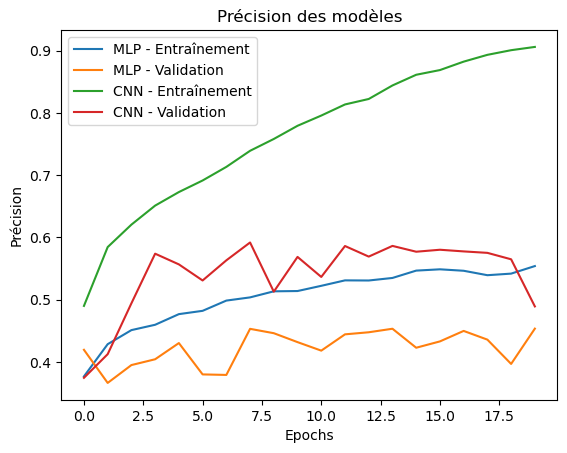

In [11]:
mlp_classification_report = classification_report(y_test_indices, mlp_pred)
cnn_classification_report = classification_report(y_test_indices, cnn_pred)

print("Rapport de classification MLP :")
print(mlp_classification_report)
print("-----------------------------------------")
print("Rapport de classification CNN :")
print(cnn_classification_report)

# Matrice de confusion pour les modèles MLP et CNN
mlp_confusion_matrix = confusion_matrix(y_test_indices, mlp_pred)
cnn_confusion_matrix = confusion_matrix(y_test_indices, cnn_pred)

print("Matrice de confusion MLP :")
print(mlp_confusion_matrix)
print("-----------------------------------------")
print("Matrice de confusion CNN :")
print(cnn_confusion_matrix)

# Visualisation des performances des modèles
plt.plot(mlp_history.history["accuracy"], label="MLP - Entraînement")
plt.plot(mlp_history.history["val_accuracy"], label="MLP - Validation")
plt.plot(cnn_history.history["accuracy"], label="CNN - Entraînement")
plt.plot(cnn_history.history["val_accuracy"], label="CNN - Validation")
plt.title("Précision des modèles")
plt.xlabel("Epochs")
plt.ylabel("Précision")
plt.legend()
plt.show()

Les résultats du MLP sont effectivement assez médiocres, et l'overfitting du modèle de CNN est d'autant plus flagrant sur la courbe, pour remédier à l'overfitting nous pouvons utiliser le dropout et l'early stopping

In [ ]:
# Remédier à l'overfitting en utilisant le dropout et l'early stopping
dropout_model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(6, activation="softmax")
])

early_stopping = keras.callbacks.EarlyStopping(patience=3)

dropout_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
dropout_history = dropout_model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Évaluation du modèle avec dropout sur les ensembles de test
dropout_val_loss, dropout_val_accuracy = dropout_model.evaluate(X_val, y_val)
dropout_test_loss,dropout_test_accuracy = dropout_model.evaluate(X_test_filtered, y_test_filtered)

Epoch 1/100
750/750 [==============================] - 26s 32ms/step - loss: 1.4306 - accuracy: 0.4468 - val_loss: 1.2765 - val_accuracy: 0.5080
Epoch 2/100
750/750 [==============================] - 26s 34ms/step - loss: 1.2183 - accuracy: 0.5344 - val_loss: 1.2477 - val_accuracy: 0.5083
Epoch 3/100
750/750 [==============================] - 25s 34ms/step - loss: 1.1404 - accuracy: 0.5668 - val_loss: 1.7315 - val_accuracy: 0.4080
Epoch 4/100
750/750 [==============================] - 25s 33ms/step - loss: 1.0888 - accuracy: 0.5860 - val_loss: 1.2278 - val_accuracy: 0.5362
Epoch 5/100
750/750 [==============================] - 25s 33ms/step - loss: 1.0419 - accuracy: 0.6083 - val_loss: 1.0326 - val_accuracy: 0.6105
Epoch 6/100
750/750 [==============================] - 26s 35ms/step - loss: 1.0121 - accuracy: 0.6209 - val_loss: 1.0523 - val_accuracy: 0.5977
Epoch 7/100
330/750 [============>.................] - ETA: 13s - loss: 0.9607 - accuracy: 0.6402

On peut voir que les problèmes d'overfitting ont été résolu. Cependant les résultats reste encore assez médiocres comme vont le montrer les résultats par la suite

### Conclusion

In [ ]:
# Conclusion sur les résultats obtenus
print("Accuracy du modèle MLP sur l'ensemble de validation :", mlp_val_accuracy)
print("Accuracy du modèle MLP sur l'ensemble de test :", mlp_test_accuracy)
print("Accuracy du modèle CNN sur l'ensemble de validation :", cnn_val_accuracy)
print("Accuracy du modèle CNN sur l'ensemble de test :", cnn_test_accuracy)
print("Accuracy du modèle avec dropout sur l'ensemble de validation :", dropout_val_accuracy)
print("Accuracy du modèle avec dropout sur l'ensemble de test :", dropout_test_accuracy)

On voit effectivement que nous n'avons plus de problèmes d'overfitting, cependant les résultats obtenus restent médiocrent, le changement des hyper-paramètres du modèle pourrait améliorer sensiblement les resultats. Le CNN reste cependant malgrès des resultats en dessous ceux attendu plus adapté à un problématique de classification d'image